In [2]:
%cd ../src

/mnt/nas/cinus/SocialAIGym/src


/mnt/nas/cinus/miniconda3/envs/sgae/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from data_component import DataComponent
from information_diffusion_component import BoundedConfidenceDiffusionComponent


In [4]:
# synthetic data generator params
num_nodes = 100
modularity = 0.5
homophily = 0.5

# bounded confidence model params
epsilon = 0.2
epsilon_backfire = 0.2
mu = 0.5


In [5]:
data = DataComponent(num_nodes, modularity, homophily)
data.pre_compute_neighboring()  # save neighbors for each node
information_diffusion_model = BoundedConfidenceDiffusionComponent(data_component=data, epsilon=epsilon, mu=mu, epsilon_backfire=epsilon_backfire)


---

Opinions stats 
mean: 0.5545348476433055
std: 0.23053503646919662
min: 0.015739486491662222
max: 0.9669202617321477


Text(0, 0.5, 'occurrences')

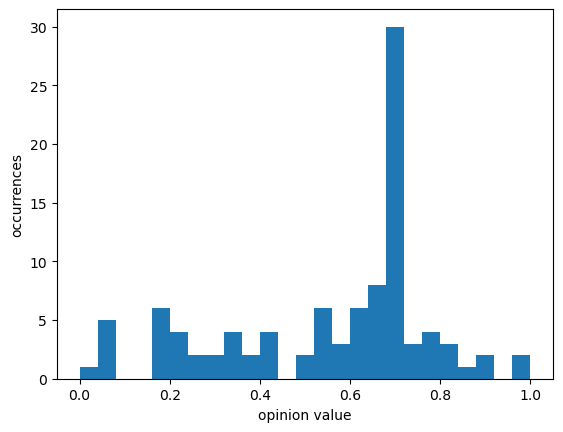

In [6]:
# print some basic statistics
opinions = information_diffusion_model.get_opinions()
print(f'Opinions stats \nmean: {opinions.mean()}\nstd: {opinions.std()}\nmin: {opinions.min()}\nmax: {opinions.max()}')

import matplotlib.pyplot as plt
_ = plt.hist(opinions, bins=25, range=[0,1])
plt.xlabel('opinion value')
plt.ylabel('occurrences')


---

In [32]:
# try to propagate some message
llm_node_id = 0
message_value = 0.75

opinion_shift_tot, num_activated_users, _ = information_diffusion_model.propagate_message(message=message_value,
                                                                                          node_id=llm_node_id)


In [33]:
# Check if message can propagate in first neighbors
for u in list(data.G.neighbors(0)):
    min_opinion, max_opinion = (data.get_opinion(u) - epsilon, data.get_opinion(u) + epsilon)
    print("message_value", message_value, f"min: {min_opinion:.3f}", f"max: {max_opinion:.3f}", min_opinion < message_value < max_opinion)

message_value 0.75 min: 0.716 max: 1.116 True
message_value 0.75 min: 0.049 max: 0.449 False
message_value 0.75 min: 0.716 max: 1.116 True
message_value 0.75 min: 0.716 max: 1.116 True
message_value 0.75 min: -0.139 max: 0.261 False
message_value 0.75 min: 0.008 max: 0.408 False


In [34]:
opinion_shift_tot

-2.6764979004724276

In [35]:
num_activated_users

65

Opinions stats 
mean: 0.6687293709774604
std: 0.2838142763156819
min: 0.051649000758010294
max: 0.961941109558201


Text(0, 0.5, 'occurrences')

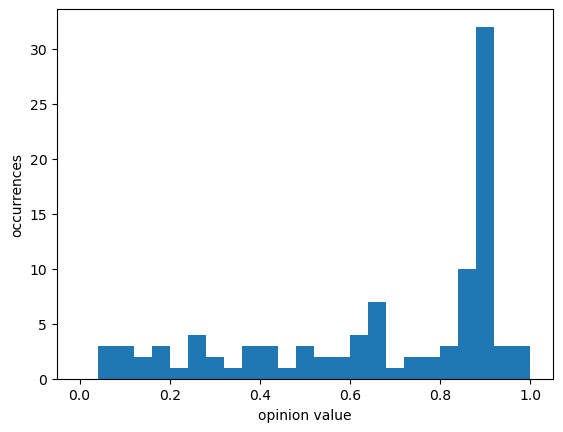

In [36]:
# print some basic statistics
opinions = information_diffusion_model.get_opinions()
print(f'Opinions stats \nmean: {opinions.mean()}\nstd: {opinions.std()}\nmin: {opinions.min()}\nmax: {opinions.max()}')

import matplotlib.pyplot as plt
_ = plt.hist(opinions, bins=25, range=[0,1])
plt.xlabel('opinion value')
plt.ylabel('occurrences')
